# Chicago Crime - Temporal Pattern Analysis

This notebook performs **temporal pattern analysis** on Chicago crime data, covering all recommended chart types:

| Analysis Type | Chart |
|--------------|-------|
| Year Trend | Line Chart ✓ |
| Month Trend | Bar Chart + Heatmap ✓ |
| Weekly Pattern | Bar Chart ✓ |
| Hourly Pattern | Bar Chart ✓ |
| Month × Hour | Heatmap ✓ |

## 1. Environment Setup and Data Loading

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Plot styling
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# Data path
DATA_PATH = Path("../data/processed/chicago_crimes_2015_2024_cleaned.csv")

df = pd.read_csv(DATA_PATH)
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2477283 entries, 0 to 2477282
Data columns (total 13 columns):
 #   Column                Dtype         
---  ------                -----         
 0   date                  datetime64[ns]
 1   primary_type          object        
 2   description           object        
 3   location_description  object        
 4   arrest                bool          
 5   domestic              bool          
 6   beat                  int64         
 7   district              float64       
 8   ward                  float64       
 9   community_area        float64       
 10  year                  int64         
 11  latitude              float64       
 12  longitude             float64       
dtypes: bool(2), datetime64[ns](1), float64(5), int64(2), object(3)
memory usage: 212.6+ MB


## 2. Temporal Feature Extraction

In [12]:
# Extract temporal features from date column
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.dayofweek  # 0=Monday, 6=Sunday
df['day_name'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['is_weekend'] = df['day_of_week'].isin([5, 6])

# Period of day: night/morning/afternoon/evening
df['period'] = pd.cut(df['hour'], 
    bins=[0, 6, 12, 18, 24], 
    labels=['Night (0-6)', 'Morning (6-12)', 'Afternoon (12-18)', 'Evening (18-24)'],
    include_lowest=True)

print("Temporal features extracted.")
df[['date', 'hour', 'day_of_week', 'day_name', 'month', 'year', 'is_weekend', 'period']].head(10)

Temporal features extracted.


,date,hour,day_of_week,day_name,month,year,is_weekend,period
0,2015-03-19 16:47:00,16,3,Thursday,3,2015,False,Afternoon (12-18)
1,2015-03-22 02:34:00,2,6,Sunday,3,2015,True,Night (0-6)
2,2015-03-26 15:45:00,15,3,Thursday,3,2015,False,Afternoon (12-18)
3,2015-03-31 12:00:00,12,1,Tuesday,3,2015,False,Morning (6-12)
4,2015-03-31 20:41:00,20,1,Tuesday,3,2015,False,Evening (18-24)
5,2015-01-10 22:20:00,22,5,Saturday,1,2015,True,Evening (18-24)
6,2015-04-06 19:00:00,19,0,Monday,4,2015,False,Evening (18-24)
7,2015-10-06 19:22:00,19,1,Tuesday,10,2015,False,Evening (18-24)
8,2015-01-03 13:05:00,13,5,Saturday,1,2015,True,Afternoon (12-18)
9,2015-01-11 03:10:00,3,6,Sunday,1,2015,True,Night (0-6)


## 3. Year Trend (Line Chart)

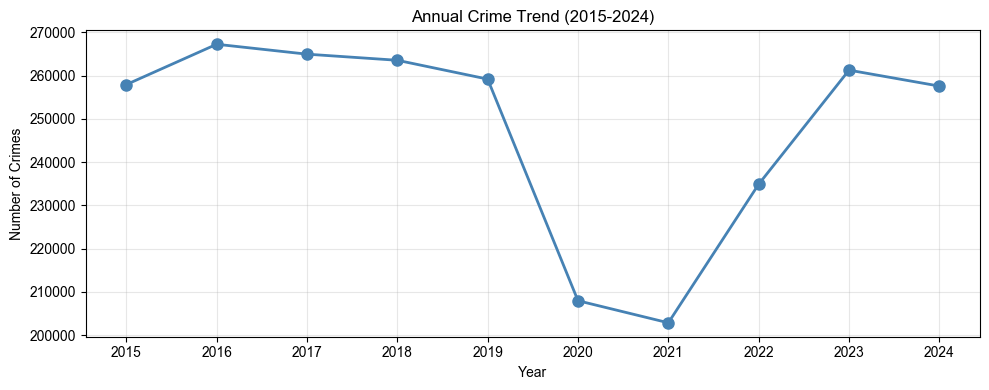

In [13]:
yearly = df.groupby('year').size()

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(yearly.index, yearly.values, marker='o', linewidth=2, markersize=8, color='steelblue')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Crimes')
ax.set_title('Annual Crime Trend (2015-2024)')
ax.set_xticks(yearly.index)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## 4. Month Trend (Bar Chart + Heatmap)

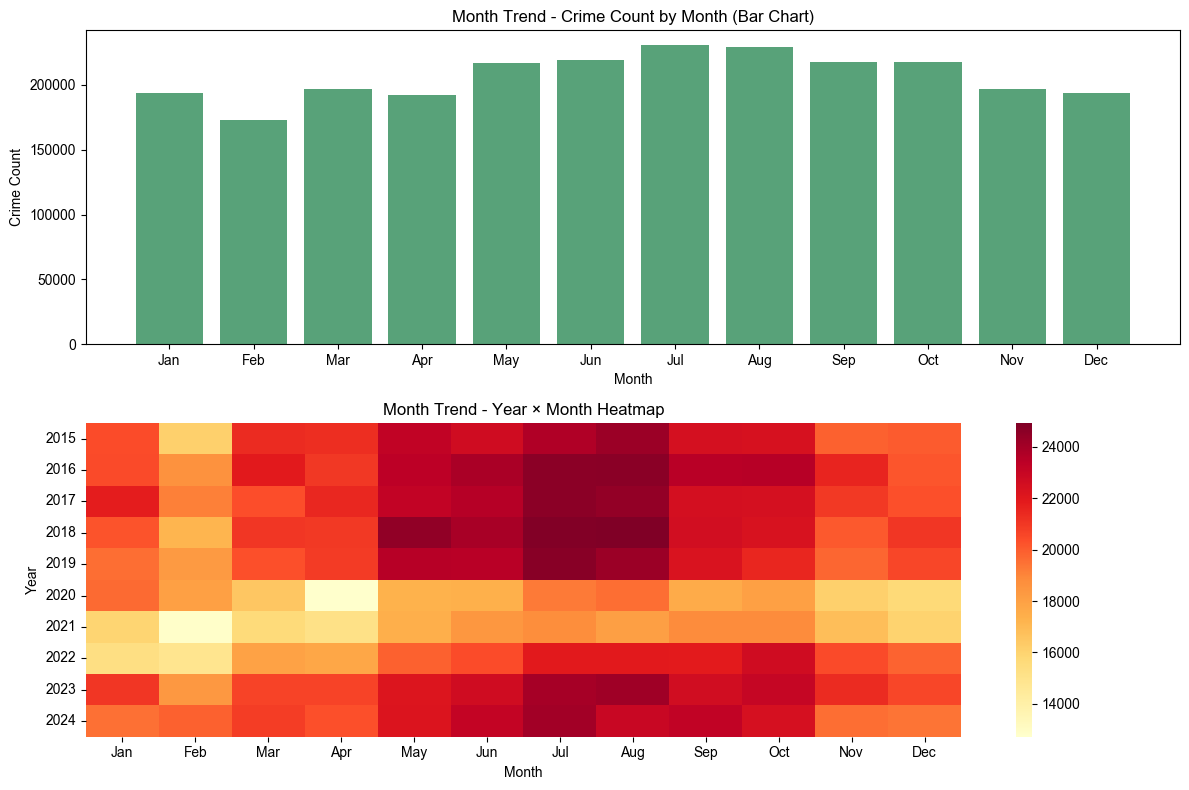

In [14]:
# Bar chart: crime count by month
month_avg = df.groupby('month').size()
month_labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Bar chart
axes[0].bar(month_avg.index, month_avg.values, color='seagreen', alpha=0.8)
axes[0].set_xticks(range(1, 13))
axes[0].set_xticklabels(month_labels)
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Crime Count')
axes[0].set_title('Month Trend - Crime Count by Month (Bar Chart)')

# Heatmap: Year × Month
year_month = df.pivot_table(index='year', columns='month', values='primary_type', aggfunc='count')
sns.heatmap(year_month, cmap='YlOrRd', ax=axes[1])
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Year')
axes[1].set_title('Month Trend - Year × Month Heatmap')
axes[1].set_xticklabels(month_labels)
plt.tight_layout()
plt.show()

## 5. Weekly Pattern (Bar Chart)

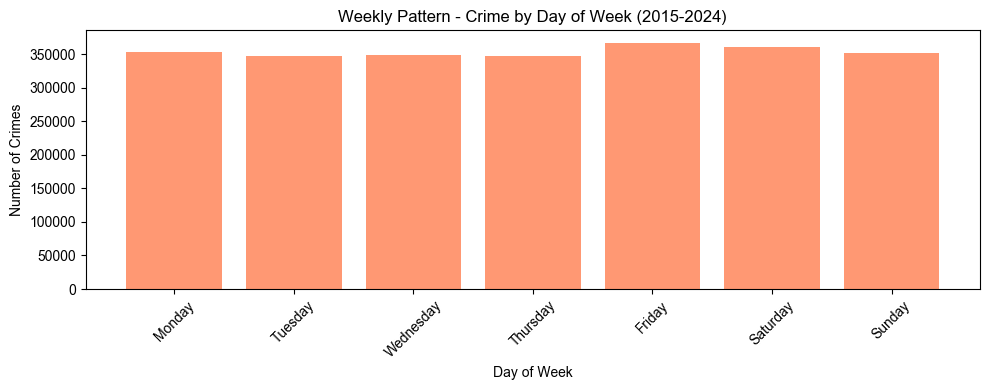

In [15]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily = df.groupby('day_name', observed=True).size().reindex(weekday_order)

fig, ax = plt.subplots(figsize=(10, 4))
ax.bar(daily.index, daily.values, color='coral', alpha=0.8)
ax.set_xlabel('Day of Week')
ax.set_ylabel('Number of Crimes')
ax.set_title('Weekly Pattern - Crime by Day of Week (2015-2024)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 6. Hourly Pattern (Bar Chart)

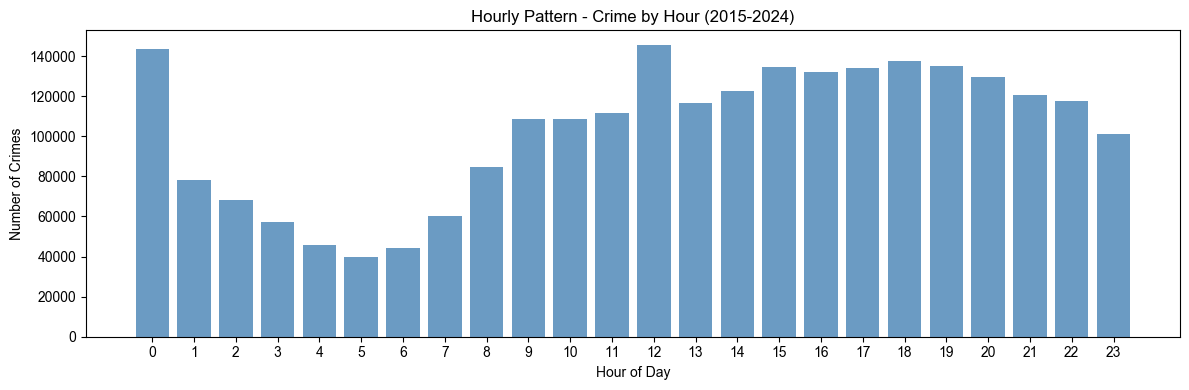

In [16]:
hourly = df.groupby('hour').size()

fig, ax = plt.subplots(figsize=(12, 4))
ax.bar(hourly.index, hourly.values, color='steelblue', alpha=0.8)
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Number of Crimes')
ax.set_title('Hourly Pattern - Crime by Hour (2015-2024)')
ax.set_xticks(range(0, 24))
plt.tight_layout()
plt.show()

## 7. Month × Hour Heatmap

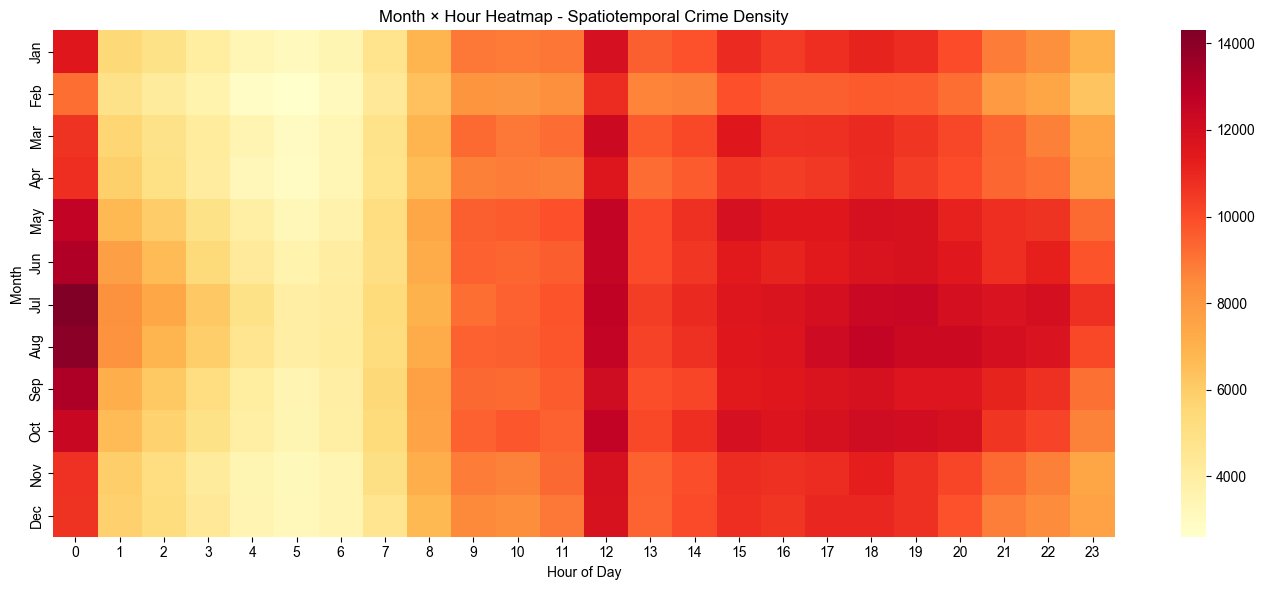

In [17]:
# Month × Hour heatmap: crime density by month and hour
month_labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
month_hour = df.pivot_table(index='month', columns='hour', values='primary_type', aggfunc='count')

fig, ax = plt.subplots(figsize=(14, 6))
sns.heatmap(month_hour, cmap='YlOrRd', ax=ax)
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Month')
ax.set_title('Month × Hour Heatmap - Spatiotemporal Crime Density')
ax.set_yticklabels(month_labels)
plt.tight_layout()
plt.show()

## 8. Hour × Day of Week Heatmap (Supplementary)

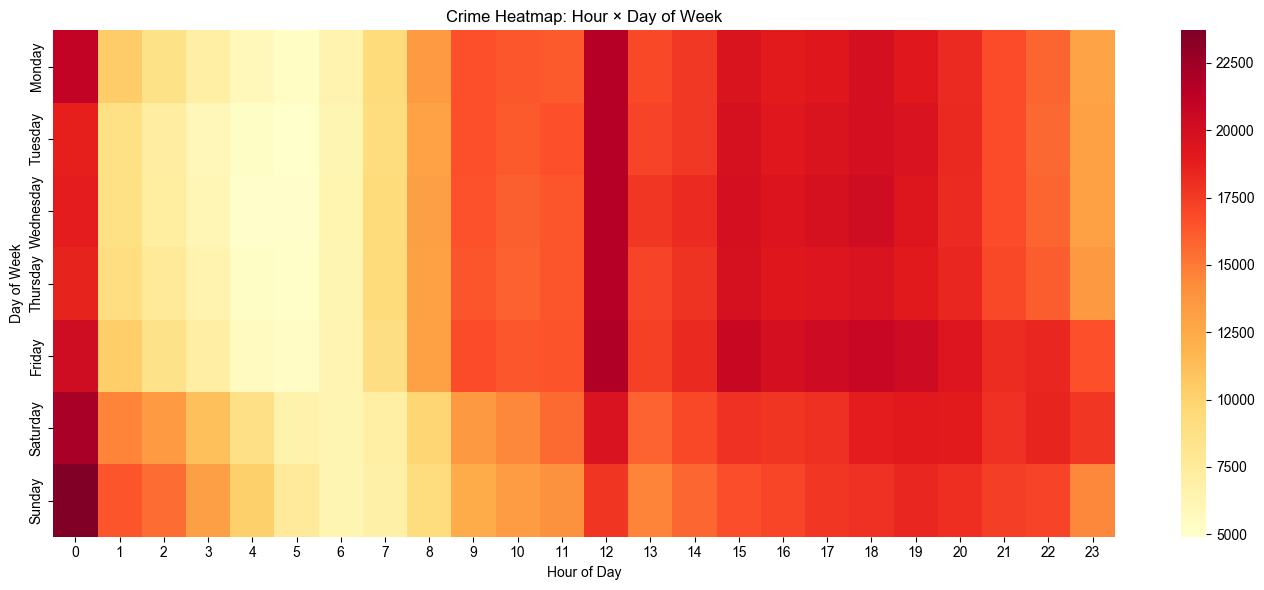

In [18]:
heatmap_data = df.pivot_table(
    index='day_name', 
    columns='hour', 
    values='primary_type', 
    aggfunc='count'
).reindex(weekday_order)

fig, ax = plt.subplots(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap='YlOrRd', ax=ax)
ax.set_title('Crime Heatmap: Hour × Day of Week')
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Day of Week')
plt.tight_layout()
plt.show()

## 9. Temporal Pattern by Crime Type

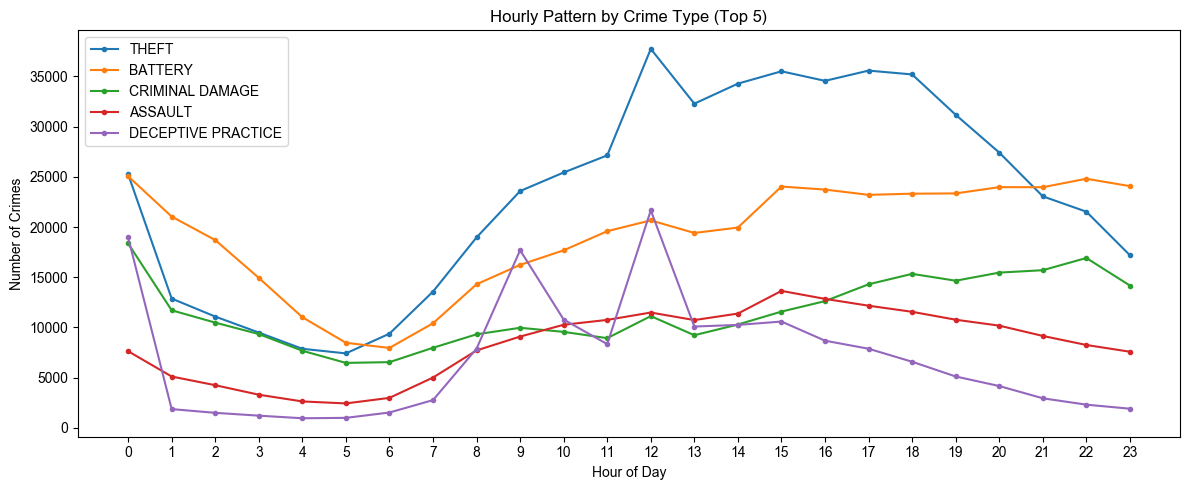

In [19]:
# Select top crime types by frequency
top_types = df['primary_type'].value_counts().head(5).index.tolist()
df_top = df[df['primary_type'].isin(top_types)]

fig, ax = plt.subplots(figsize=(12, 5))
for crime_type in top_types:
    subset = df_top[df_top['primary_type'] == crime_type]
    hourly = subset.groupby('hour').size()
    ax.plot(hourly.index, hourly.values, label=crime_type, marker='o', markersize=3)

ax.set_xlabel('Hour of Day')
ax.set_ylabel('Number of Crimes')
ax.set_title('Hourly Pattern by Crime Type (Top 5)')
ax.legend()
ax.set_xticks(range(0, 24))
plt.tight_layout()
plt.show()

## 10. Weekday vs Weekend Comparison

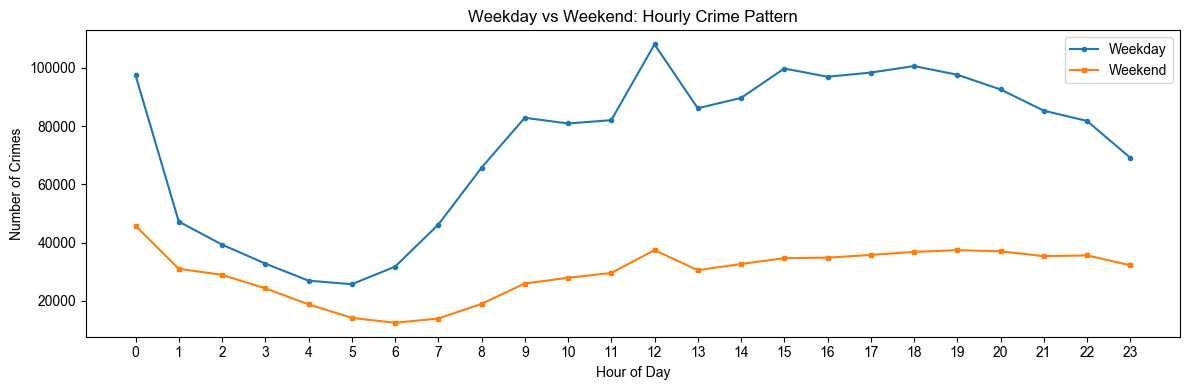

In [20]:
weekend_hourly = df[df['is_weekend']].groupby('hour').size()
weekday_hourly = df[~df['is_weekend']].groupby('hour').size()

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(weekday_hourly.index, weekday_hourly.values, label='Weekday', marker='o', markersize=3)
ax.plot(weekend_hourly.index, weekend_hourly.values, label='Weekend', marker='s', markersize=3)
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Number of Crimes')
ax.set_title('Weekday vs Weekend: Hourly Crime Pattern')
ax.legend()
ax.set_xticks(range(0, 24))
plt.tight_layout()
plt.show()